In [2]:
import cv2
import numpy as np 
from utils import show_images, mask_img

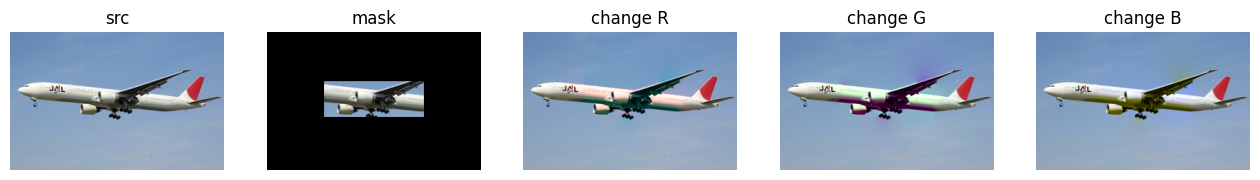

In [66]:
# ColorChange：一个便捷函数，对 mask 标注的 ROI 进行颜色上的变换
airplane_img = cv2.imread("./image/poisson/airplane.jpg", -1)

airplane_mask = np.zeros(airplane_img.shape, airplane_img.dtype)
airplane_mask[70:120, 80:220] = 255

output1 = cv2.colorChange(airplane_img, airplane_mask, red_mul=2.0, green_mul=1.0, blue_mul=1.0)
output2 = cv2.colorChange(airplane_img, airplane_mask, red_mul=1.0, green_mul=2.0, blue_mul=1.0)
output3 = cv2.colorChange(airplane_img, airplane_mask, red_mul=1.0, green_mul=1.0, blue_mul=2.0)

show_images([
    ('src', airplane_img),
    ('mask', mask_img(airplane_img, airplane_mask)),
    ('change R', output1),
    ('change G', output2),
    ('change B', output3),
], colnum=5, scale=2)

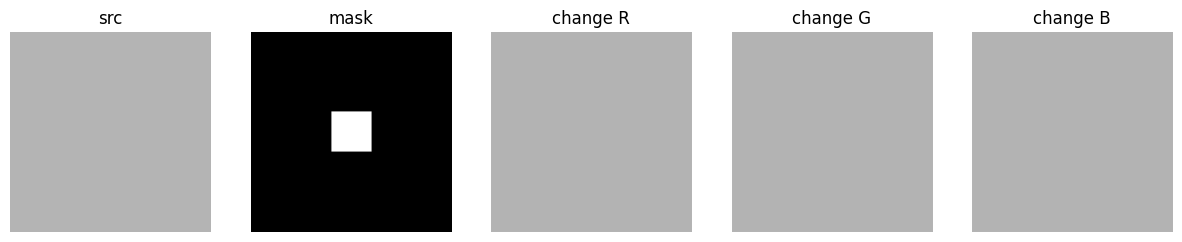

In [67]:
# ColorChange 不是简单的相乘，和泊松融合有关系
pure_gray = np.ones((100, 100, 3), dtype=np.uint8) * 180
pure_mask = np.zeros((100, 100), dtype=np.uint8)
pure_mask[40:60, 40:60] = 255

output1 = cv2.colorChange(pure_gray, pure_mask, red_mul=5.0, green_mul=1.0, blue_mul=1.0)
output2 = cv2.colorChange(pure_gray, pure_mask, red_mul=1.0, green_mul=5.0, blue_mul=1.0)
output3 = cv2.colorChange(pure_gray, pure_mask, red_mul=1.0, green_mul=1.0, blue_mul=5.0)

show_images([
    ('src', pure_gray),
    ('mask', pure_mask),
    ('change R', output1),
    ('change G', output2),
    ('change B', output3),
], colnum=5, scale=3)

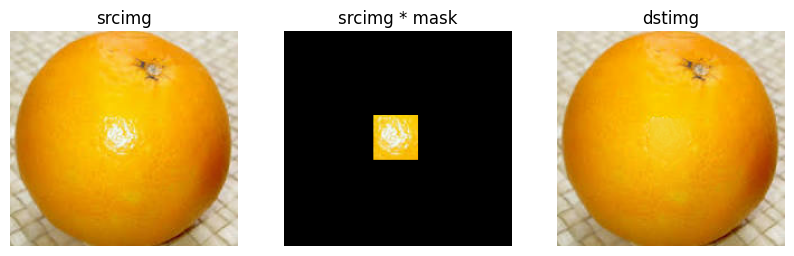

In [5]:
# illuminationChange： 去除高亮
orange_img = cv2.imread("./image/poisson/orange.jpg", -1)

orange_mask = np.zeros(orange_img.shape, orange_img.dtype)
orange_mask[75:115, 80:120] = 255

orange_result = cv2.illuminationChange(orange_img, orange_mask, dst=None, alpha=0.5, beta=0.5)

show_images([
    ('srcimg', orange_img),
    ('srcimg * mask', mask_img(orange_img, orange_mask)),
    ('dstimg', orange_result),
], scale=3)

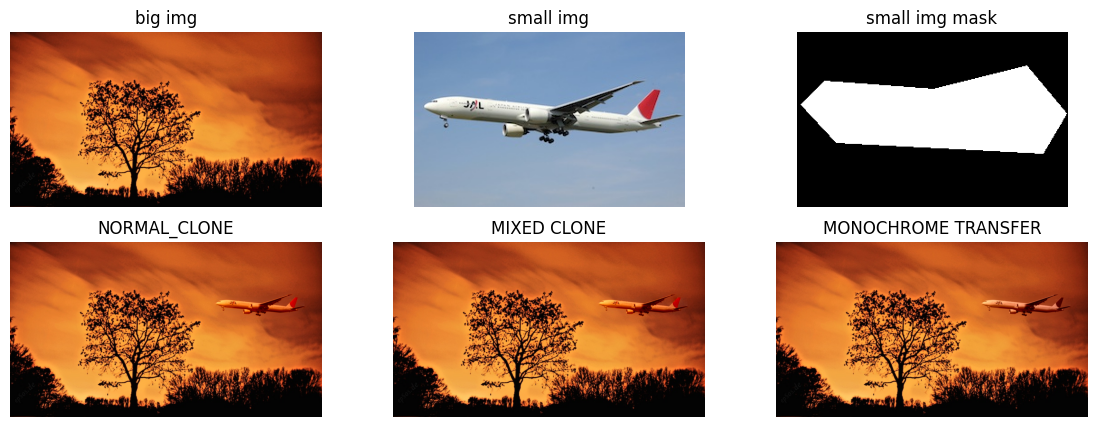

In [6]:
# SeamlessClone：融合两张图片

img1 = cv2.imread("./image/poisson/airplane.jpg")
img2 = cv2.imread("./image/poisson/sky.jpg")

# Create a rough mask around the airplane.
mask = np.zeros(img1.shape, img1.dtype)
poly = np.array([ [4,80], [30,54], [151,63], [254,37], [298,90], [272,134], [43,122] ], np.int32)
cv2.fillPoly(mask, [poly], (255, 255, 255))

out1 = cv2.seamlessClone(img1, img2, mask, (800, 200), flags=cv2.NORMAL_CLONE)
out2 = cv2.seamlessClone(img1, img2, mask, (800, 200), flags=cv2.MIXED_CLONE)
out3 = cv2.seamlessClone(img1, img2, mask, (800, 200), flags=cv2.MONOCHROME_TRANSFER)


show_images([
    ('big img', img2),
    ('small img', img1),
    ('small img mask', mask),
    ('NORMAL_CLONE', out1),
    ('MIXED CLONE', out2),
    ('MONOCHROME TRANSFER', out3)
], colnum=3, scale=5)

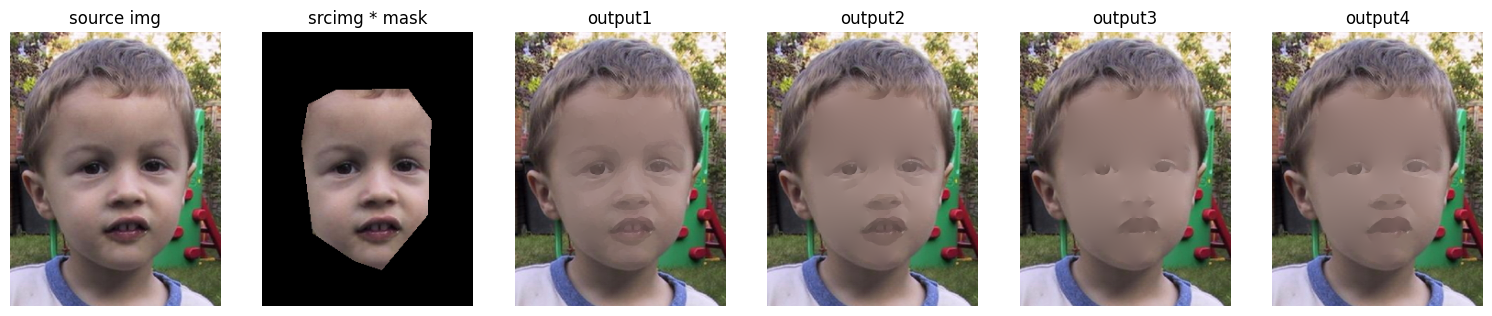

In [69]:
# textureFlatten：融合两张图片

img1 = cv2.imread("./image/poisson/person.jpg")

mask = np.zeros(img1.shape, img1.dtype)
poly = np.array([ [50,80], [80,64], [159,63], [184,97], [182,134], [180, 200], [130, 260], [100, 250], [55, 220], [43,122] ], np.int32)
cv2.fillPoly(mask, [poly], (255, 255, 255))

# low_threshold 和 high_threshold 和 kernel_size 控制纹理的平滑程度，其实都是 Canny 的参数
out1 = cv2.textureFlattening(img1, mask, dst=None, low_threshold=30, high_threshold=45, kernel_size=3)
out2 = cv2.textureFlattening(img1, mask, dst=None, low_threshold=100, high_threshold=125, kernel_size=3)
out3 = cv2.textureFlattening(img1, mask, dst=None, low_threshold=200, high_threshold=225, kernel_size=3)
out4 = cv2.textureFlattening(img1, mask, dst=None, low_threshold=30, high_threshold=225, kernel_size=3)

show_images([
    ('source img', img1),
    ('srcimg * mask', mask_img(img1, mask)),
    ('output1', out1),
    ('output2', out2),
    ('output3', out3),
    ('output4', out4),
], colnum=6, scale=4)